In [241]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from sklearn.metrics import mutual_info_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LogisticRegression

In [242]:
all_columns = ["age", "job", "marital", "education", "balance", "housing", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"]

In [243]:
bank_df = pd.read_csv("bank-full.csv", delimiter=";", usecols=all_columns)
bank_df.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,1,no,unknown,5,may,198,1,-1,0,unknown,no


## check missing values

In [244]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Question 1
ans = secondary

In [245]:
bank_df["education"].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

## Correlation matrix

In [246]:
bank_df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [247]:
numeric_columns = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]
categorical_columns =  ['job', 'marital', 'education', 'housing', 'contact', 'month',  'poutcome']

In [248]:
for col in categorical_columns:
    bank_df[col] = bank_df[col].str.lower().str.replace(' ', "_")

In [249]:
corr_matrix = bank_df[numeric_columns].corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<Axes: >

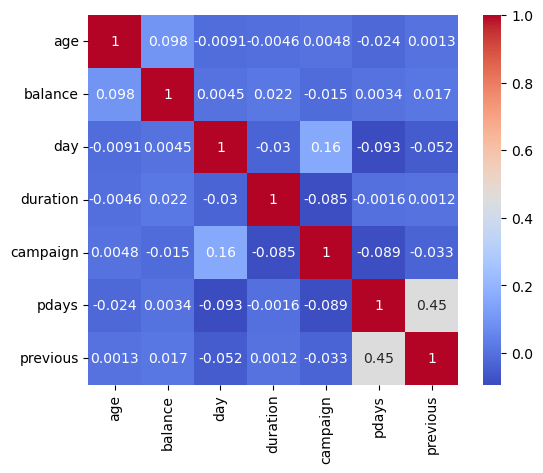

In [250]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

## encode y

In [251]:
bank_df["y"] = (bank_df.y == "yes").astype(int)
bank_df.y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

## data splitting

In [252]:
df_full_train, df_test = train_test_split(bank_df, test_size=0.2, random_state=42)
df_full_train.shape, df_test.shape

((36168, 15), (9043, 15))

In [253]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train.shape, df_val.shape

((27126, 15), (9042, 15))

In [254]:
y_train = df_train['y']
y_val = df_val['y']
y_test = df_test['y']

del df_train['y']
del df_val['y']
del df_test['y']

## Mutual info score

In [255]:
def mutual_info(series):
    return mutual_info_score(series, y_train)

In [256]:
mi = df_train[categorical_columns].apply(mutual_info)

round(mi.sort_values(ascending=False),2)

poutcome     0.03
month        0.03
contact      0.01
housing      0.01
job          0.01
education    0.00
marital      0.00
dtype: float64

## Train a model

In [257]:
dv = DictVectorizer()

train_dicts = df_train[categorical_columns + numeric_columns].to_dict(orient="records")
val_dicts = df_val[categorical_columns + numeric_columns].to_dict(orient="records")
test_dicts = df_test[categorical_columns + numeric_columns].to_dict(orient="records")

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

In [258]:

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

model.coef_[0]

array([-2.00523311e-03,  1.07562568e-05, -8.31669577e-02,  2.65103826e-01,
        8.61369738e-02, -1.31132269e+00,  8.38425793e-03,  4.11456162e-03,
       -4.29946694e-01, -2.45019832e-01, -5.56118109e-02, -2.29503552e-01,
       -1.27222320e-01, -8.32859568e-01,  7.65160865e-02, -2.06827968e-01,
       -2.71902014e-01, -3.26731090e-01, -7.66834538e-02,  2.81494397e-01,
       -3.10040169e-01, -1.29817976e-01,  2.85376305e-01, -1.45453241e-01,
        2.72411026e-02, -1.63253868e-01, -3.07550477e-01, -4.67789849e-01,
       -1.84741562e-01, -1.48791563e-02, -7.28760875e-01,  3.75583342e-01,
       -3.48439881e-01, -1.16765381e+00, -1.02893559e+00,  3.41997224e-01,
        1.48870498e+00, -5.00907110e-01, -1.00853355e+00,  8.23287733e-01,
        8.08454800e-01, -4.17877307e-04, -7.90179585e-01, -6.41396870e-01,
        1.44429564e+00, -9.72801075e-01,  1.16647940e-02])

In [259]:
y_pred = model.predict(X_val)

original_accuracy = (y_pred == y_val).mean()

round(original_accuracy, 2)

0.9

## feature elimination

In [ ]:

feature_accuracy = []

for feature in categorical_columns + numeric_columns:

    features = categorical_columns + numeric_columns
    
    features.remove(feature)
    
    dv = DictVectorizer()
    train_dicts = df_train[features].to_dict(orient="records")
    val_dicts = df_val[features].to_dict(orient="records")
    
    
    X_train = dv.fit_transform(train_dicts)
    X_val = dv.transform(val_dicts)


    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)

    accuracy_without_feature = (y_pred == y_val).mean()

    feature_accuracy.append([feature, accuracy_without_feature])



In [ ]:
accuracy_result = pd.DataFrame(feature_accuracy, columns=['missing_feature','accuracy'])
accuracy_result['diff']  = original_accuracy - accuracy_result['accuracy']

accuracy_result.sort_values(by="diff", ascending=True)

In [ ]:

features = categorical_columns + numeric_columns

dv = DictVectorizer()
train_dicts = df_train[features].to_dict(orient="records")
val_dicts = df_val[features].to_dict(orient="records")

X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

c_accuracy  = []
for c in [0.01, 0.1, 1, 10, 100]:


    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)

    accuracy = (y_pred == y_val).mean()

    c_accuracy.append([c, round(accuracy,3)])



In [ ]:
accuracy_result = pd.DataFrame(c_accuracy, columns=['c','accuracy'])

accuracy_result.sort_values(by="accuracy", ascending=False)